# Geometric Brownian Motion

Geometric Brownian motion $X(t)$ is the solution to the multiplicative noise stochastic differential equation

$$dX = \mu X dt + \sigma X dW. $$

One can solve this SDE to get

$$X(t)=X(0)\exp\left[\left(\mu -\frac{1}{2}\sigma^2\right)t+\sigma W(t)\right].$$

Note the unexpect $-\sigma^2/2$ term in the exponential. This illustrates that the Wiener noise $dW$ in the original SDE introduces an effective force that decreases $X(t)$ and works agains the growth term $\mu$.

The multivariate generalization of the process is straight forward:

$$dX_i = \mu_i X_i dt + \sigma_i X_i dW_i. $$

For multi-variate processes one has to specify the covariance structure of the Wiener increments

$$\left<\Delta W_n(t_i)\Delta W_m(t_j)\right>=S_{nm}\delta_{ij}$$

The matrix $\mathbf S $ contains the covariance of the increments. By default it is equal to the identity matrix, so the dimensions are uncorrelated.

You can check the options for the function `wiener()` and the examples in the notebook `WienerProcess.ipynb`.



In [2]:
## This is just for colors of the plots
from palettable.wesanderson import GrandBudapest3_6
import matplotlib as mpl
from cycler import cycler
mpl.rcParams['axes.prop_cycle'] = cycler(color=GrandBudapest3_6.mpl_colors)
## --------

import matplotlib.pyplot as plt
import numpy as np
import stopro as p

## One-dimensional Geometric Brownian Motion with default values

Here are a few realization of geometric Brownian motion for $\mu=\sigma=1$. Note that in this case one would expect an overall increase in trajectories.

This is noticable on a log scale (right panel)

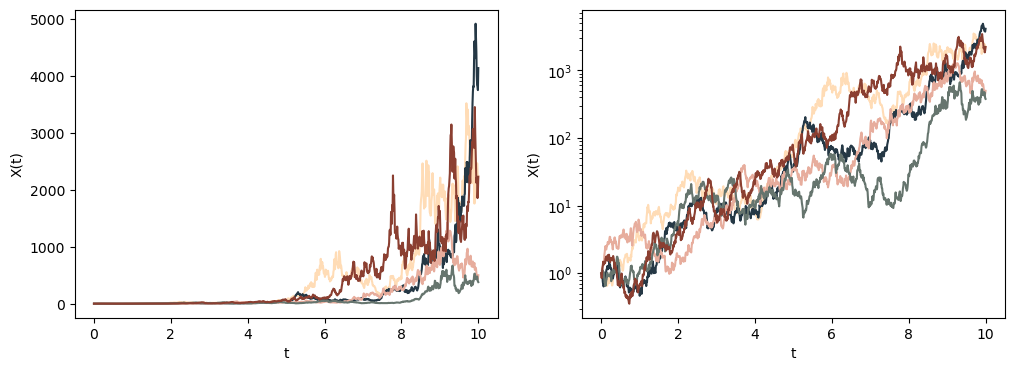

In [5]:
T = 10
dt = 0.001
gap = 10
samples = 5

res = p.geometric_brownian_motion(T,dt,gap=gap,samples=samples)

fig,ax = plt.subplots(1,2,figsize=[12,4])
for i in range(len(res["X"])):
    ax[0].plot(res["t"],np.squeeze(res["X"][i]))
    ax[0].set_xlabel("t")
    ax[0].set_ylabel("X(t)")
    ax[1].plot(res["t"],np.squeeze(res["X"][i]))
    ax[1].set_xlabel("t")
    ax[1].set_ylabel("X(t)")
    ax[1].set_yscale("log")

plt.show()

## Another example with $\mu<\sigma^2/2$

Here we have an example for which the prefactor $\mu-\sigma^2/2$ in the solution is negativ, so a regime where the noise "pushes" the realization to lower and lower values.

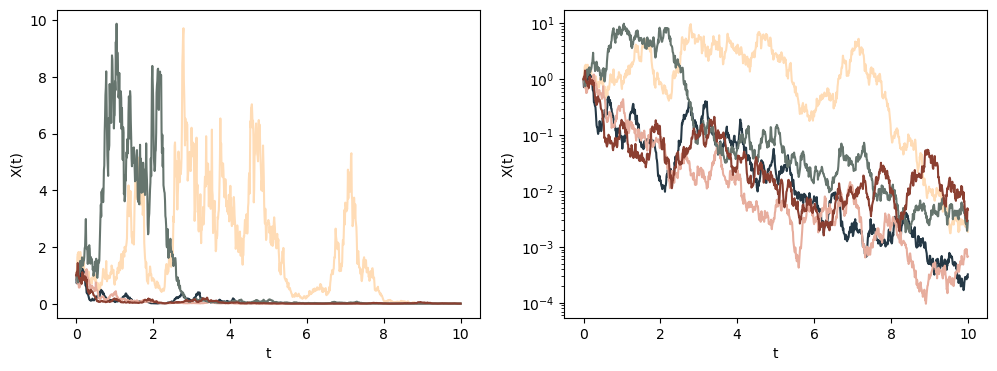

In [6]:
T = 10
dt = 0.001
gap = 10
samples = 5
mu = 0.5
sigma = 1.5

res = p.geometric_brownian_motion(T,dt,gap=gap,samples=samples,mu=mu,sigma=sigma)

fig,ax = plt.subplots(1,2,figsize=[12,4])
for i in range(len(res["X"])):
    ax[0].plot(res["t"],np.squeeze(res["X"][i]))
    ax[0].set_xlabel("t")
    ax[0].set_ylabel("X(t)")
    ax[1].plot(res["t"],np.squeeze(res["X"][i]))
    ax[1].set_xlabel("t")
    ax[1].set_ylabel("X(t)")
    ax[1].set_yscale("log")

plt.show()

## Special case $\mu=0$

This case is the solution to

$$dX=\sigma X dW$$.

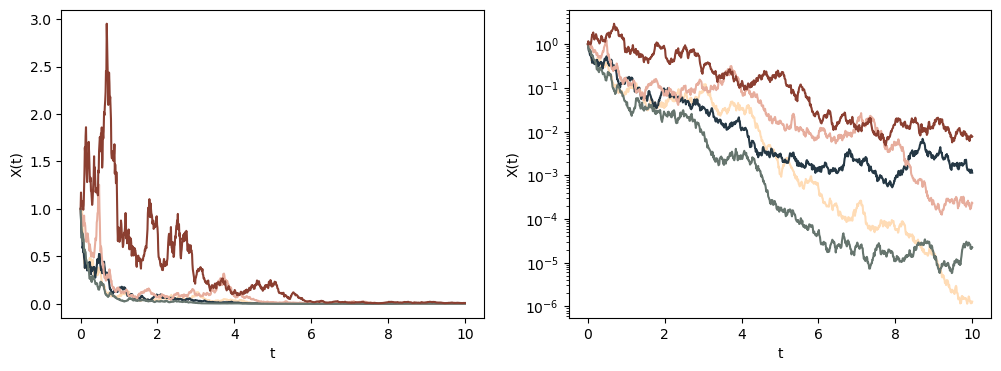

In [7]:
T = 10
dt = 0.001
gap = 10
samples = 5
mu = 0

res = p.geometric_brownian_motion(T,dt,gap=gap,samples=samples,mu=mu)

fig,ax = plt.subplots(1,2,figsize=[12,4])
for i in range(len(res["X"])):
    ax[0].plot(res["t"],np.squeeze(res["X"][i]))
    ax[0].set_xlabel("t")
    ax[0].set_ylabel("X(t)")
    ax[1].plot(res["t"],np.squeeze(res["X"][i]))
    ax[1].set_xlabel("t")
    ax[1].set_ylabel("X(t)")
    ax[1].set_yscale("log")

plt.show()

## Multivariate Processes

For multivariate processes we can choose different values for $\mu_i$ and $\sigma_i$. If `covariance` and `mixing_matrix`are not specified the Wiener increments $d W_i$ are independent.

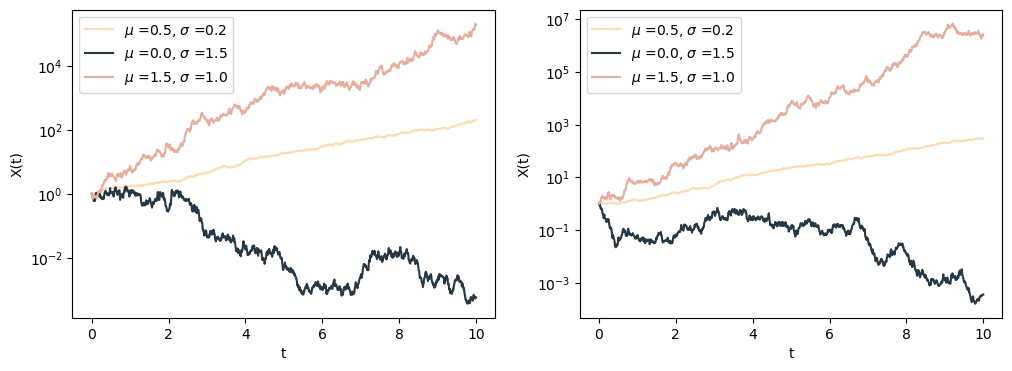

In [8]:
T = 10
dt = 0.001
gap = 10
N = 3
samples = 2
sigma = np.array((0.2,1.5,1))
mu = np.array((0.5,0,1.5))

res = p.geometric_brownian_motion(T,dt,gap=gap,samples=samples,N=N,mu=mu,sigma=sigma)
leg=[r"$\mu$ ="+f'{x:.1f}'+r", $\sigma$ ="+f'{y:.1f}' for (x,y) in zip(res["mu"],res["sigma"])]

fig,ax = plt.subplots(1,samples,figsize=[12,4])
for i in range(samples):
    for j in range(len(sigma)):
        ax[i].plot(res["t"],np.squeeze(res["X"][i][j]))
        ax[i].set_xlabel("t")
        ax[i].set_ylabel("X(t)")
        ax[i].set_yscale("log")
        ax[i].legend(leg)
plt.show()

## Here's and example with a non-trivial covariance matrix $\mathbf S$

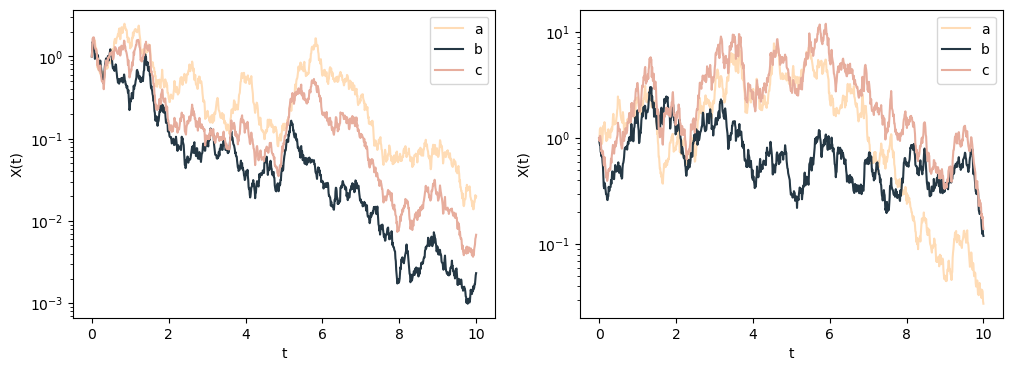

In [9]:
T = 10
dt = 0.001
gap = 10
samples = 2
sigma = 1
mu = 0

a = 1.0/np.sqrt(2)

A=np.array([[np.cos(x),np.sin(x)] for x in [0,np.pi/2,np.pi/4]]);

res = p.geometric_brownian_motion(T,dt,N=3,gap=gap,samples=samples,mu=mu,sigma=sigma,mixing_matrix=A)

fig,ax = plt.subplots(1,samples,figsize=[12,4])
for i in range(samples):
    for j in range(3):
        ax[i].plot(res["t"],np.squeeze(res["X"][i][j]))
        ax[i].set_xlabel("t")
        ax[i].set_ylabel("X(t)")
        ax[i].set_yscale("log")
        ax[i].legend(["a","b","c"])
plt.show()